In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
columnas = {'Baños': 'Banos', 'Área': 'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7104,Apartamento,Apartamento en venta en San Antonio Norte,3,2,62,San Antonio Norte,Engativá,$ 215.000.000
5046,Apartamento,Apartamento en venta en Chico Navarra,3,5,192,Chico Navarra,USAQUÉN: Country Club + Santa Bárbara,$ 1.250.000.000
2508,Casa,Casa en venta en Fontibón,2,1,41,Fontibón,Fontibón,$ 150.000.000
1112,Apartamento,Apartamento en venta en El Chicó,5,4,200,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 1.800.000.000
6449,Apartamento,Apartamento en venta en Santa Barbara,1,1,59,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 390.500.000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
inmuebles.Valor[0]

'$ 360.000.000'

In [ ]:
type(inmuebles.Valor[0])

str

In [ ]:
inmuebles.Valor[0]+inmuebles.Valor[1]

'$ 360.000.000$ 670.000.000'

In [ ]:
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [ ]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [ ]:
valor_separado = inmuebles.Valor.str.split(expand=True)
type(valor_separado)

pandas.core.frame.DataFrame

In [ ]:
inmuebles['Moneda'] = valor_separado[0]
inmuebles['Precio'] = valor_separado[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
5510,Apartamento,Apartamento en venta en Puente Aranda,3,1,52,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 120.000.000,$,120.000.000
6673,Apartamento,Apartamento en venta en Hayuelos,3,2,77,Hayuelos,Modelia,$ 298.000.000,$,298.000.000
2951,Apartamento,Apartamento en venta en Bosa,3,1,48,Bosa,Bosa Central,$ 129.000.000,$,129.000.000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [ ]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
7417,Apartamento,Apartamento en venta en Teusaquillo,1,1,42,Teusaquillo,Teusaquillo,$ 253.500.000,$,253500000
3202,Apartamento,Apartamento en venta en Quinta Paredes,2,3,153,Quinta Paredes,Teusaquillo,$ 739.000.000,$,739000000
473,Apartamento,Apartamento en venta en San Patricio,2,2,72,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 420.000.000,$,420000000


In [ ]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
700,Apartamento,Apartamento en venta en Kennedy,3,1,49,Kennedy,Kennedy Central,$ 175.000.000,$,175000000,175.0
4526,Apartamento,Apartamento en venta en Barrios Unidos,3,3,120,Barrios Unidos,Los Andes,$ 518.000.000,$,518000000,518.0
6003,Apartamento,Apartamento en venta en Antonio Nariño,3,2,59,Antonio Nariño,Restrepo,$ 245.000.000,$,245000000,245.0
1849,Edificio,Edificio en venta en Santa Fe,2,5,232,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 820.000.000,$,820000000,820.0
5336,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 125.000.000,$,125000000,125.0
9287,Apartamento,Apartamento en venta en Santa Paula,3,3,150,Santa Paula,USAQUÉN: Country Club + Santa Bárbara,$ 930.000.000,$,930000000,930.0
4844,Oficina/Consultorio,Oficina/Consultorio en venta en La Candelaria,1,1,24,La Candelaria,La Candelaria,$ 74.300.000,$,74300000,74.3
948,Apartamento,Apartamento en venta en Barrios Unidos,2,2,79,Barrios Unidos,Los Andes,$ 490.000.000,$,490000000,490.0
1630,Apartamento,Apartamento en venta en Suba,3,3,118,Suba,Suba,$ 740.000.000,$,740000000,740.0
4368,Apartamento,Apartamento en venta en Engativa,3,2,60,Engativa,Engativá,$ 260.000.000,$,260000000,260.0


In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
inmuebles.loc[inmuebles.Habitaciones==110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [ ]:
inmuebles.loc[inmuebles.Area==2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

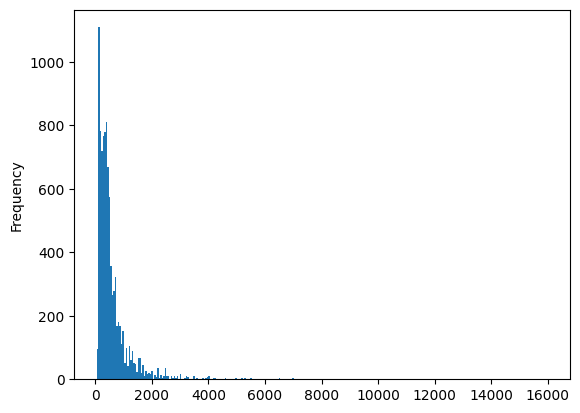

In [ ]:
inmuebles['Precio_Millon'].plot.hist(bins=300)

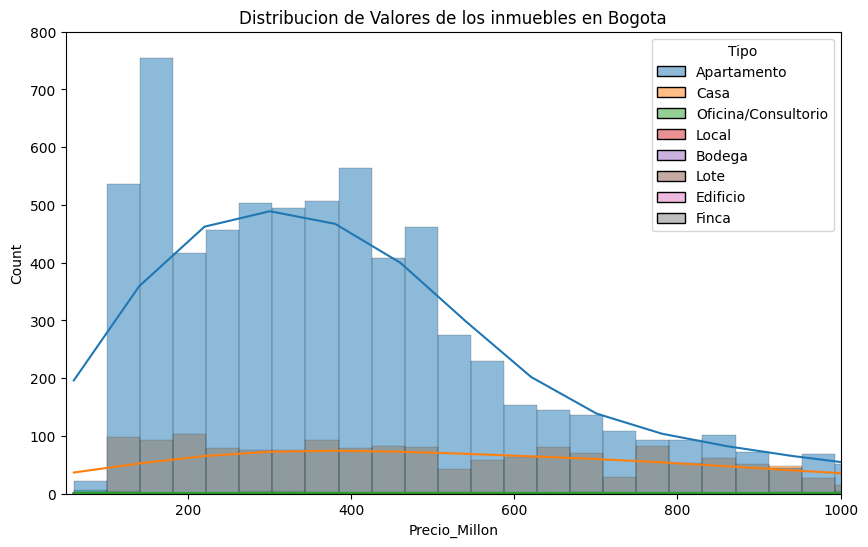

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x="Precio_Millon", kde=True, hue='Tipo')
grafica.set_title('Distribucion de Valores de los inmuebles en Bogota')
plt.xlim((50,1000))
plt.ylim((0,800))
plt.savefig('/content/drive/MyDrive/valor_inmuebles.png',format='png')
plt.show()

In [ ]:
#Desafio

#1. Estudiar mejor el histograma de valores, seleccionar, seleccionar 3 tipos de inmuebles 
#Refinar el grafico, Titulos, aumentar el tama;o de labels, colores, conclusion de la informacion
#2. Precio del m2 por barrio y hacer el grafico mas adecuado para esta nueva variable